#import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle

#read the dataset

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("fraud.csv")  # Update with actual path

# Separate the two classes
df_not_fraud = df[df['isFraud'] == 0]
df_fraud = df[df['isFraud'] == 1]

# Downsample the majority class (isNotFraud) to 10,000
df_not_fraud_downsampled = resample(
    df_not_fraud,
    replace=False,
    n_samples=10000,
    random_state=42
)

# Combine with minority class (keep all fraud cases)
df_balanced = pd.concat([df_not_fraud_downsampled, df_fraud])

# Shuffle to randomize
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to new file
df_balanced.to_csv("balanced_fraud_dataset.csv", index=False)


In [ ]:
df=pd.read_csv("balanced_fraud_dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1,0
1,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1,0
2,136,TRANSFER,217843.20,C995422404,0.00,0.00,C1019554569,4462848.33,4864424.74,0,0
3,252,CASH_IN,97423.93,C1118488668,1511386.68,1608810.61,C249567389,4942694.11,4845270.18,0,0
4,332,PAYMENT,7096.45,C256057521,628.00,0.00,M854372537,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18208,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,1,0
18209,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,1,0
18210,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
18211,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,136,TRANSFER,217843.20,C995422404,0.00,0.00,C1019554569,4462848.33,4864424.74,0
3,252,CASH_IN,97423.93,C1118488668,1511386.68,1608810.61,C249567389,4942694.11,4845270.18,0
4,332,PAYMENT,7096.45,C256057521,628.00,0.00,M854372537,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
18208,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,1
18209,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,1
18210,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0
18211,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0


In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,136,TRANSFER,217843.20,C995422404,0.00,0.00,C1019554569,4462848.33,4864424.74,0
3,252,CASH_IN,97423.93,C1118488668,1511386.68,1608810.61,C249567389,4942694.11,4845270.18,0
4,332,PAYMENT,7096.45,C256057521,628.00,0.00,M854372537,0.00,0.00,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
18208,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,1
18209,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,1
18210,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0
18211,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0
18212,522,TRANSFER,1752606.15,C1333169684,1752606.15,0.00,C722968916,0.00,0.00,1


In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [ ]:
#check for correlation ->


# Check column data types
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object
                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.154121       0.072871       -0.023591   
amount          0.154121  1.000000       0.613717        0.108165   
oldbalanceOrg   0.072871  0.613717       1.000000        0.838572   
newbalanceOrig -0.023591  0.108165       0.838572        1.000000   
oldbalanceDest -0.006195  0.010399       0.009980        0.039121   
newbalanceDest  0.027865  0.256375       0.109709        0.005811   
isFraud         0.326588  0.359047       0.124771       -0.128963   

                oldbalanceDest  newbalanceDest   isFraud  
step                 -0.006195        0.027865  0.326588  
amount                0.010399        0.256375  0.35904

<Axes: >

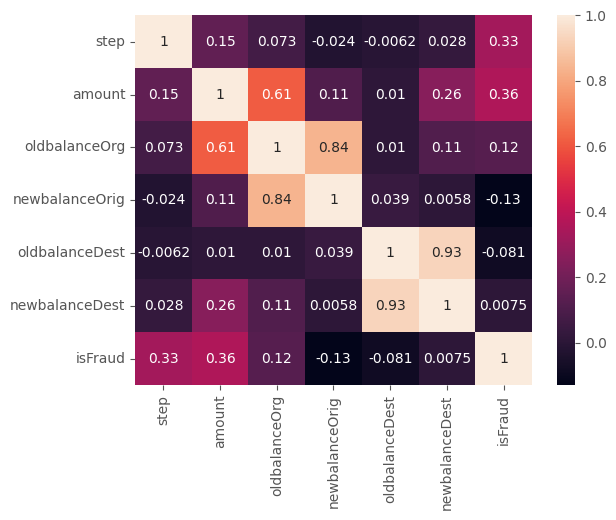

In [ ]:
sns.heatmap(numeric_df.corr(),annot=True)

#visualising and analysis data

#Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

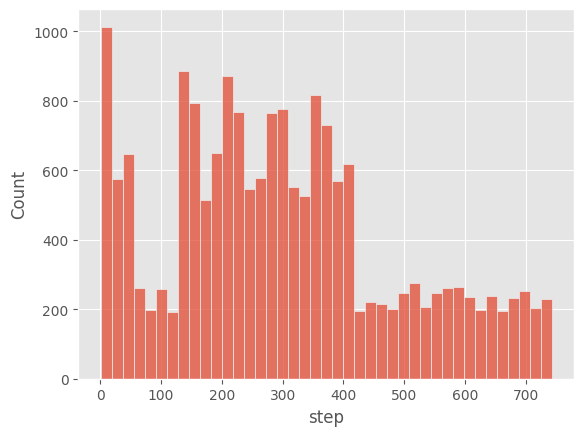

In [ ]:
#step
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

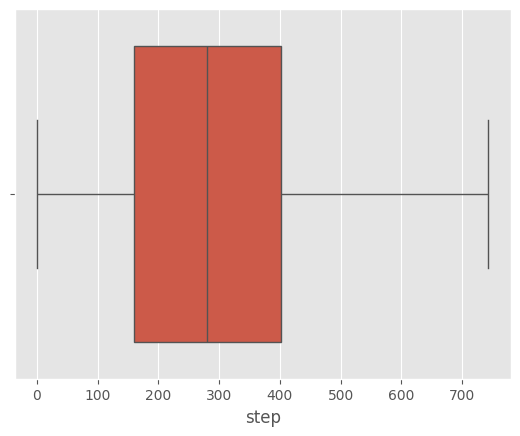

In [ ]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

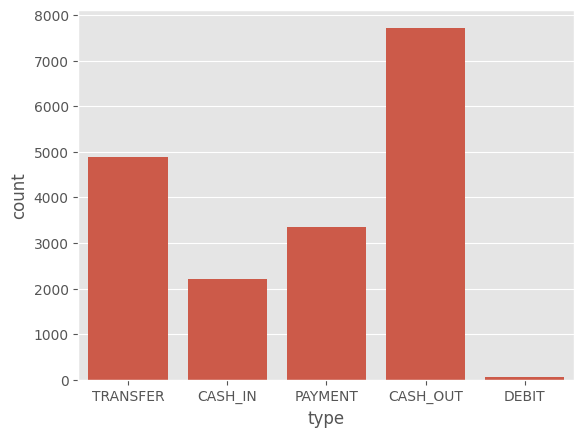

In [ ]:
#type
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

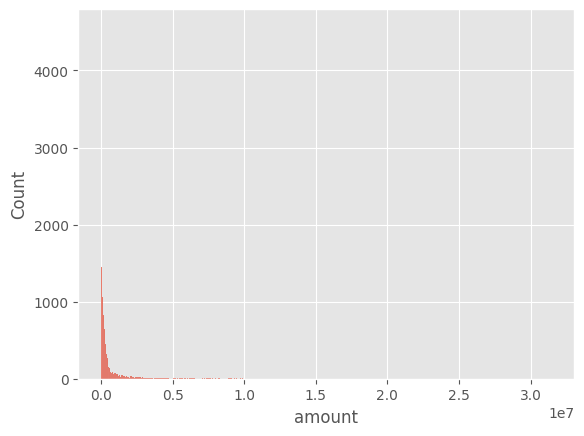

In [ ]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

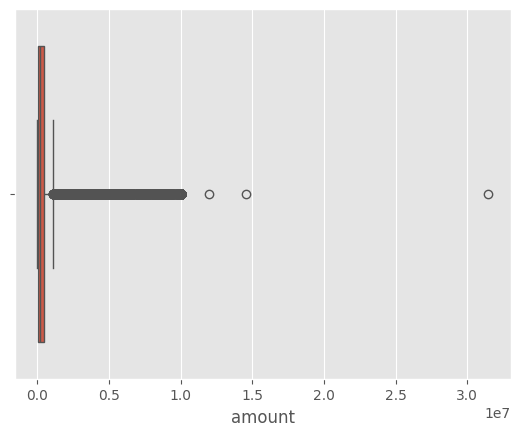

In [ ]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

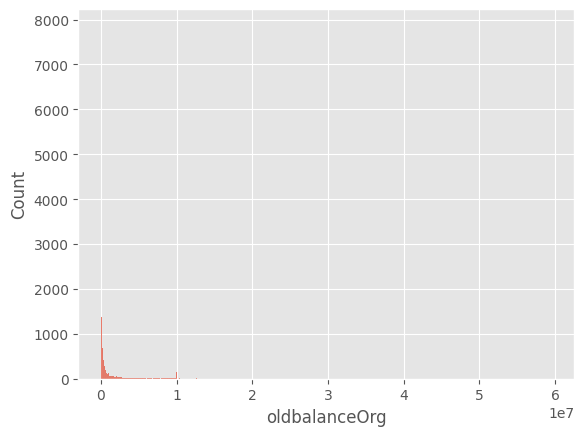

In [ ]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [ ]:
#nameDest
df.nameDest.value_counts()

,count
nameDest,
C1338686176,3
C1561140816,3
C164033249,3
C2020337583,3
C330226144,3
...,...
C374088909,1
C1869015300,1
C1294873831,1


<Axes: xlabel='oldbalanceDest'>

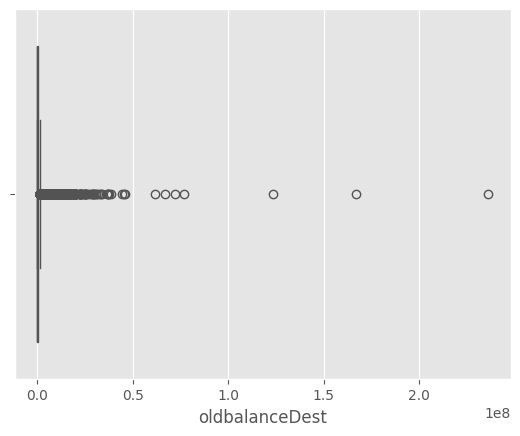

In [ ]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

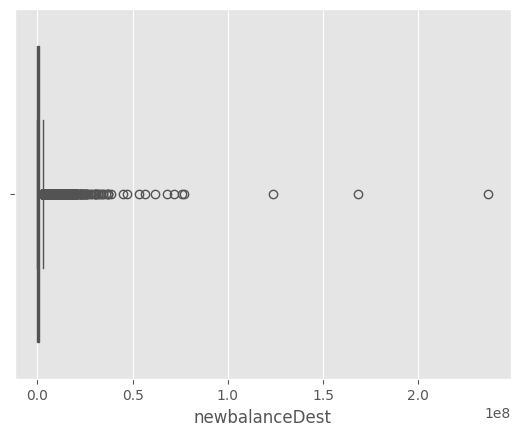

In [ ]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

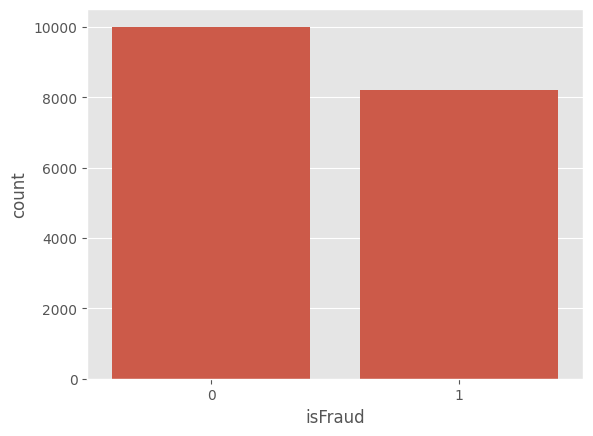

In [ ]:
#isFraud
sns.countplot(data=df,x='isFraud')

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,10000
1,8213


In [ ]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,is Fraud
1,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,is Fraud
2,136,TRANSFER,217843.20,C995422404,0.00,0.00,C1019554569,4462848.33,4864424.74,is not Fraud
3,252,CASH_IN,97423.93,C1118488668,1511386.68,1608810.61,C249567389,4942694.11,4845270.18,is not Fraud
4,332,PAYMENT,7096.45,C256057521,628.00,0.00,M854372537,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
18208,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,is Fraud
18209,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,is Fraud
18210,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,is not Fraud
18211,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,is not Fraud


#bivariate Analysis

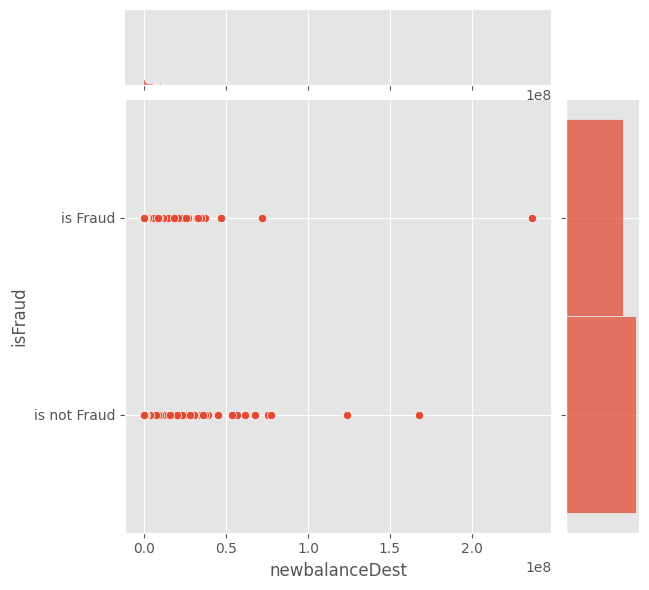

In [ ]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

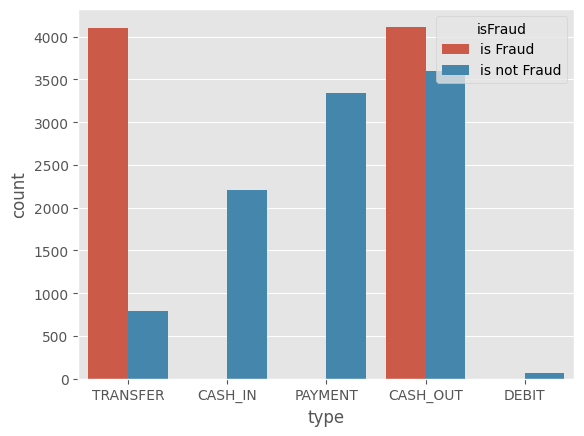

In [ ]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

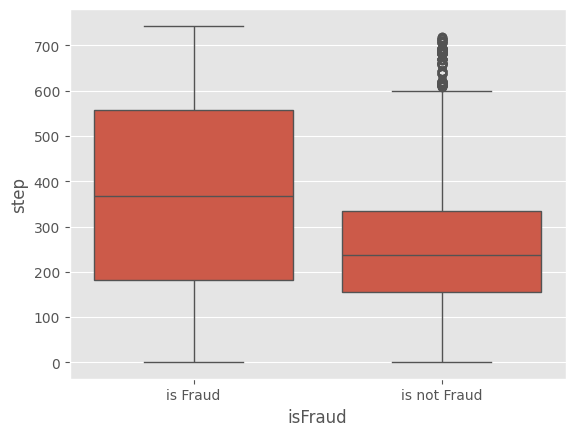

In [ ]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

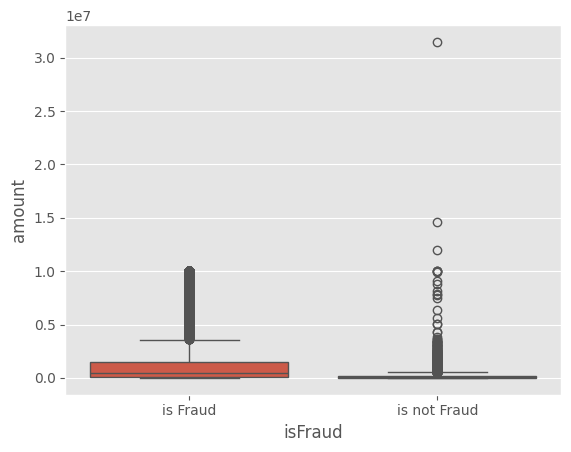

In [ ]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

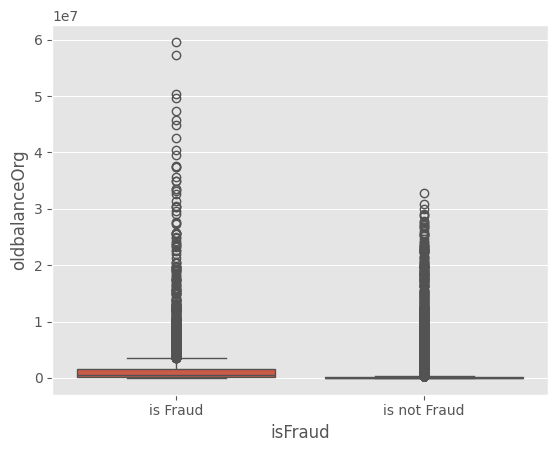

In [ ]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

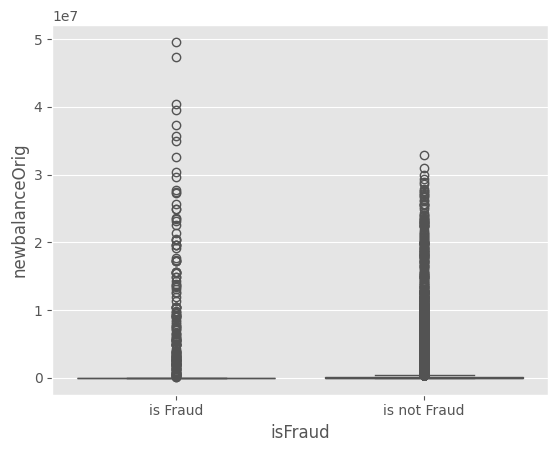

In [ ]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

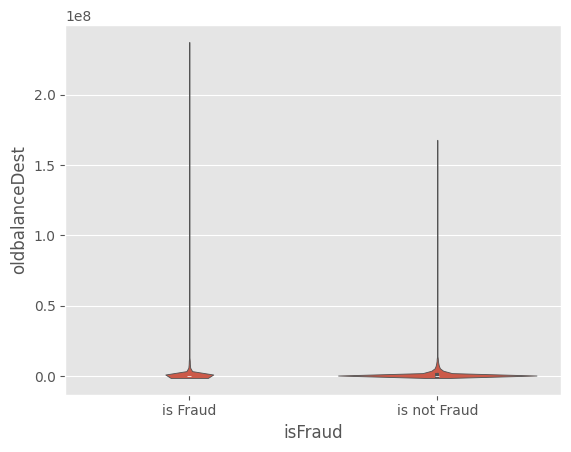

In [ ]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

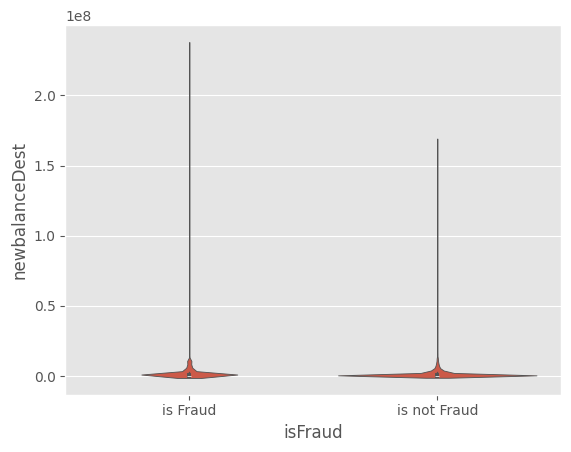

In [ ]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

#descriptive analysis

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,18213.000000,18213,1.821300e+04,18213,1.821300e+04,1.821300e+04,18213,1.821300e+04,1.821300e+04,18213
unique,NaN,5,NaN,18213,NaN,NaN,17972,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1333169684,NaN,NaN,C1338686176,NaN,NaN,is not Fraud
freq,NaN,7719,NaN,1,NaN,NaN,3,NaN,NaN,10000
mean,299.952781,NaN,7.607322e+05,NaN,1.203497e+06,5.588933e+05,NaN,8.499842e+05,1.248386e+06,NaN
std,189.979179,NaN,1.785152e+06,NaN,3.240780e+06,2.575574e+06,NaN,3.437453e+06,3.801429e+06,NaN
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,160.000000,NaN,3.276758e+04,NaN,6.460000e+03,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,280.000000,NaN,1.616653e+05,NaN,1.015620e+05,0.000000e+00,NaN,0.000000e+00,1.363052e+05,NaN
75%,402.000000,NaN,4.664228e+05,NaN,6.991836e+05,0.000000e+00,NaN,5.645954e+05,1.090220e+06,NaN


#data preprocessing

check for null values ->

In [ ]:
#finding all null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            18213 non-null  int64  
 1   type            18213 non-null  object 
 2   amount          18213 non-null  float64
 3   nameOrig        18213 non-null  object 
 4   oldbalanceOrg   18213 non-null  float64
 5   newbalanceOrig  18213 non-null  float64
 6   nameDest        18213 non-null  object 
 7   oldbalanceDest  18213 non-null  float64
 8   newbalanceDest  18213 non-null  float64
 9   isFraud         18213 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


handling outliers->

<Axes: xlabel='amount'>

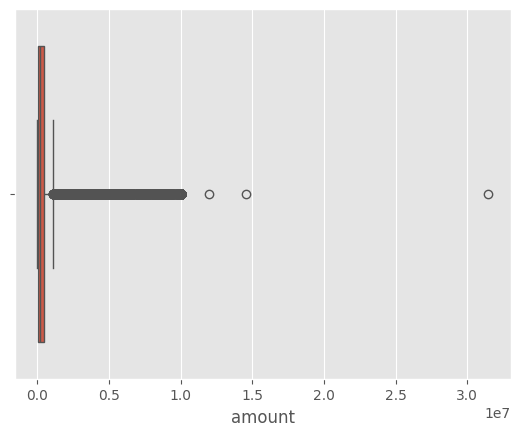

In [ ]:
sns.boxplot(x=df['amount'])

remove the outliers ->

In [ ]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(289))
760732.1569433921


In [ ]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print('q1 :',q1)
print('q3 :',q3)
print( 'IQR :', IQR)
print( 'Upper Bound :', upper_bound)
print('Lower Bound :', lower_bound)
print( 'Skewed data :' ,len(df[df['amount']>upper_bound]))
print( 'Skewed data :' ,len(df[df['amount']<lower_bound]))

q1 : 32767.58
q3 : 466422.84
IQR : 433655.26
Upper Bound : 1116905.73
Lower Bound : -617715.31
Skewed data : 2716
Skewed data : 0


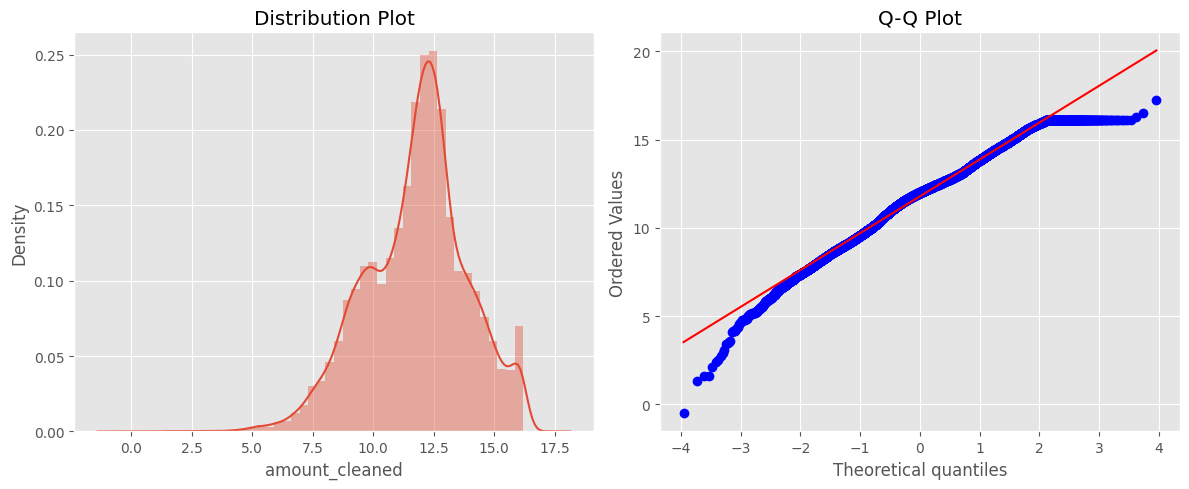

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to visualize transformation effect
def transformationPlot(feature):
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.distplot(feature, kde=True)
    plt.title("Distribution Plot")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(feature, plot=plt)
    plt.title("Q-Q Plot")

    plt.tight_layout()
    plt.show()

# Check for zero or negative values
invalid_count = (df['amount'] <= 0).sum()
if invalid_count > 0:
    print(f"Warning: Found {invalid_count} zero or negative values. Handling them.")

# Replace zero or negative values with NaN
df['amount_cleaned'] = df['amount'].apply(lambda x: x if x > 0 else np.nan)

# Drop rows with NaN
df_cleaned = df.dropna(subset=['amount_cleaned', 'isFraud'])

# Apply log transformation
log_transformed = np.log(df_cleaned['amount_cleaned'])

# Use the transformationPlot function
transformationPlot(log_transformed)



In [ ]:
# Ensure no extra spaces in column names
df.columns = df.columns.str.strip()

# Check for zero or negative values
invalid_count = (df['amount'] <= 0).sum()
if invalid_count > 0:
    print(f"Warning: Found {invalid_count} zero or negative values. Replacing them with NaN.")

# Replace zero or negative values with NaN
df['amount_cleaned'] = df['amount'].apply(lambda x: x if x > 0 else np.nan)

# Drop rows with NaN
df_cleaned = df.dropna(subset=['amount_cleaned', 'isFraud'])

# Update the original column after handling invalid values
df['amount'] = np.log(df_cleaned['amount_cleaned'])

# Confirm execution
print("Log transformation applied successfully.")


Log transformation applied successfully.


object data labelencoding ->

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type']=la.fit_transform(df['type'])
df['type'].value_counts()

,count
type,
1,7719
4,4888
3,3342
0,2202
2,62


dividing data into dependent and independent y and x respectively

In [ ]:
x = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']


In [ ]:
print("Any NaNs in y?", y.isna().sum())


Any NaNs in y? 0


In [ ]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amount_cleaned
0,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,321307.31
1,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,10000000.00
2,136,TRANSFER,217843.20,C995422404,0.00,0.00,C1019554569,4462848.33,4864424.74,217843.20
3,252,CASH_IN,97423.93,C1118488668,1511386.68,1608810.61,C249567389,4942694.11,4845270.18,97423.93
4,332,PAYMENT,7096.45,C256057521,628.00,0.00,M854372537,0.00,0.00,7096.45
...,...,...,...,...,...,...,...,...,...,...
18208,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,99808.45
18209,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,176273.29
18210,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,8369.07
18211,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,262120.50


In [ ]:
# Convert labels to binary
y = y.replace({'is not Fraud': 0, 'is Fraud': 1}).astype(int)


In [ ]:
y

,isFraud
0,1
1,1
2,0
3,0
4,0
...,...
18208,1
18209,1
18210,0
18211,0


splitting data into train and test ->

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all object columns in x
label_encoders = {}
for col in x.columns:
    if x[col].dtype == 'object':
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
        label_encoders[col] = le  # Save encoder for future use (e.g., on test data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(14557, 10)
(3640, 10)
(14557,)
(3640,)


Handling imbalanced dataset ( using SMOTE technique ) :

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_train, y_train = smote.fit_resample(x_train, y_train)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=x.columns)

x_test = std_scaler.transform(x_test)
x_test = pd.DataFrame(x_test,columns=x.columns)

In [ ]:
import joblib
joblib.dump(std_scaler, 'scaler.pkl')

['scaler.pkl']

#model building

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score (y_test,y_test_predict1)
test_accuracy

0.993956043956044

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict1)

col_0,0,1
isFraud,,
0,1981,16
1,6,1637


In [ ]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1997
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3640
   macro avg       0.99      0.99      0.99      3640
weighted avg       0.99      0.99      0.99      3640



Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9898351648351649

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict2)

col_0,0,1
isFraud,,
0,1979,18
1,19,1624


In [ ]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1997
           1       0.99      0.99      0.99      1643

    accuracy                           0.99      3640
   macro avg       0.99      0.99      0.99      3640
weighted avg       0.99      0.99      0.99      3640



ExtraTrees Classifier


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test, y_test_predict3)
test_accuracy

0.9895604395604396

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,1976,21
1,17,1626


In [ ]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1997
           1       0.99      0.99      0.99      1643

    accuracy                           0.99      3640
   macro avg       0.99      0.99      0.99      3640
weighted avg       0.99      0.99      0.99      3640



SupportVectorMachine Classifier





In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train, y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.910989010989011

In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9106271896682009

In [ ]:
pd.crosstab(y_test,y_test_predict4)

col_0,0,1
isFraud,,
0,1932,65
1,259,1384


In [ ]:
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1997
           1       0.96      0.84      0.90      1643

    accuracy                           0.91      3640
   macro avg       0.92      0.90      0.91      3640
weighted avg       0.91      0.91      0.91      3640



In [ ]:
# 1. Encode categorical features
# from sklearn.preprocessing import LabelEncoder
# label_encoders = {}

# for col in x.columns:
#     if x[col].dtype == 'object':
#         le = LabelEncoder()
#         x[col] = le.fit_transform(x[col])
#         label_encoders[col] = le

# # 2. Train-test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)




In [ ]:
# # 3. Train SVC with class_weight='balanced'
# from sklearn.svm import SVC
# svc = SVC(kernel='linear', class_weight='balanced', random_state=0)
# svc.fit(x_train, y_train)

# # 4. Predict
# y_train_pred = svc.predict(x_train)
# y_test_pred = svc.predict(x_test)



In [ ]:
# # 5. Evaluation
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import pandas as pd

# print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

# print("\nClassification Report:\n")
# print(classification_report(y_test, y_test_pred, target_names=["is not Fraud", "is Fraud"]))

# print("\nConfusion Matrix:\n")
# print(pd.crosstab(y_test, y_test_pred, rownames=["Actual"], colnames=["Predicted"]))

Xgboost Classifier


In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict5)
test_accuracy


0.9950549450549451

In [ ]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict5)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
0,1985,12
1,6,1637


In [ ]:
print(classification_report(y_test,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1997
           1       0.99      1.00      0.99      1643

    accuracy                           1.00      3640
   macro avg       0.99      1.00      1.00      3640
weighted avg       1.00      1.00      1.00      3640



Compare the models


In [ ]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",  accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",  accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",  accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",  accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",  accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc", accuracy_score (y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5,y_train))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5,y_test))

In [ ]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.993956043956044
train accuracy for dtc 1.0
test accuracy for dtc 0.9898351648351649
train accuracy for etc 1.0
test accuracy for etc 0.9895604395604396
train accuracy for svc 0.9106271896682009
test accuracy for svcc 0.910989010989011
train accuracy for xgb1 1.0
test accuracy for xgb1 0.9950549450549451


Improving XGBoost classification model

In [ ]:
# Step 1: Calculate class weight
#neg, pos = np.bincount(y_train)
#scale_weight = neg / pos  # fraud class weight

# Step 2: Initialize model with proper params
#xgb1 = xgb.XGBClassifier(
    #scale_pos_weight=scale_weight,
    #use_label_encoder=False,
    #eval_metric='logloss',
    #random_state=42
#)

# Step 3: Train model
#xgb1.fit(x_train, y_train)


In [ ]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Predict class probabilities
#y_probs = xgb1.predict_proba(x_test)[:, 1]

# Step 5: Use lower threshold to improve recall
#threshold = 0.3  # try 0.3 instead of 0.5
#y_pred_thresh = (y_probs > threshold).astype(int)

# Step 6: Evaluate
#print(confusion_matrix(y_test, y_pred_thresh))
#print(classification_report(y_test, y_pred_thresh))


In [ ]:
#from sklearn.metrics import precision_recall_curve
#import matplotlib.pyplot as plt

#precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

#plt.plot(recall, precision, marker='.')
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
#plt.grid(True)
#plt.show()


Saving the model


In [ ]:
import pickle

# Save the trained model
pickle.dump(xgb1, open('xgboost_fraud_model.pkl', 'wb'))


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# svc= SVC()
# svc.fit(x_train,y_train)
# y_test_predict4=svc.predict(x_test)
# test_accuracy=accuracy_score(y_test,y_test_predict4)
# test_accuracy

In [ ]:
# y_train_predict4=svc.predict(x_train)
# train_accuracy=accuracy_score(y_train,y_train_predict4)
# train_accuracy

In [ ]:
# import pickle
# pickle.dump(svc,open('payments.pkl','wb'))